In [1]:
import cv2
import numpy as np
from pathlib import Path
from collections import Counter
import os
import matplotlib.pyplot as plt

from detect import YoloInferenece

%matplotlib inline

/home/pirate/.local/share/virtualenvs/ai_prog_lec-IUo41nw4/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plates_detector = YoloInferenece("car_plate_detector.pt", imgsz=512)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Gamed ya ged3an


In [3]:
def crop_plates(img_folder_path, output_folder_path):
    img_dir = Path(img_folder_path)
    images = sorted(list(map(str, list(img_dir.glob("*.jpg")))))
    i = 0
    for image in images:
        xywh = plates_detector.get_plate_xywh(image)
        if xywh is None:
            continue
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plate = img[xywh[1]:xywh[3], xywh[0]:xywh[2]]
        cv2.imwrite(f"{output_folder_path}/{i}.jpg", plate)
        i = i + 1

In [4]:
def shuffle_plates(img_folder_path, output_folder_path):
    data_dir = Path(img_folder_path)
    imgs = list(map(str, list(data_dir.glob("*.jpg"))))
    # shuffle the images
    imgs = np.random.permutation(imgs)
    j = 0
    for i in imgs:
        im = cv2.imread(i)
        cv2.imwrite(f"{output_folder_path}/{j}.jpg", im)
        j = j + 1

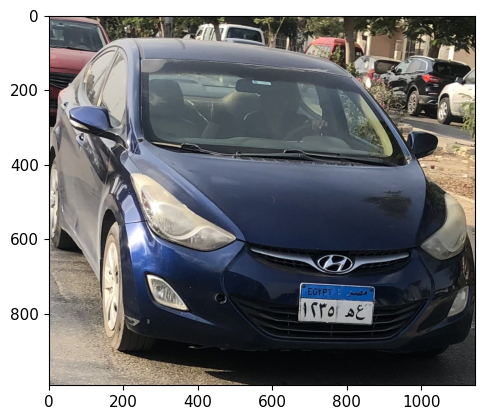

In [5]:
img = cv2.imread("test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
xywh = plates_detector.get_plate_xywh("test.jpg")
print(xywh)

(655, 713, 886, 829)


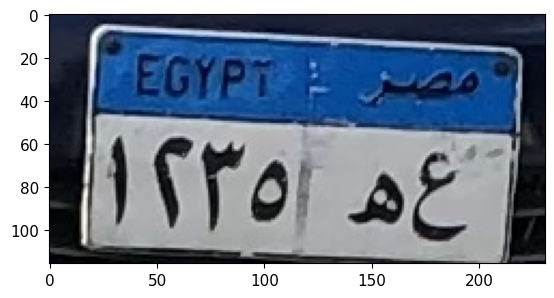

In [8]:
plate = img[xywh[1]:xywh[3], xywh[0]:xywh[2]]
plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))